In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import signal, fftpack
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import hilbert, chirp, find_peaks

In [2]:
# Load data dari file Excel

# Rata-rata 1 Sisi Kepadatan 30%
df30_data = pd.read_excel('rata_rata.xlsx', usecols=['X', '30Y'])

# Rata-rata 1 Sisi Kepadatan 50%
df50_data = pd.read_excel('rata_rata.xlsx', usecols=['X', '50Y'])

# Rata-rata 1 Sisi Kepadatan 70%
df70_data = pd.read_excel('rata_rata.xlsx', usecols=['X', '70Y'])

# Rata-rata 1 Sisi Kepadatan 90%
df90_data = pd.read_excel('rata_rata.xlsx', usecols=['X', '90Y'])

time_data = pd.read_excel('rata_rata.xlsx', usecols=['X'])

time_long = time_data['X'].to_numpy()
start_index = 1
end_index = 1551
time = time_long[start_index:end_index]

df30_signal_data = df30_data['30Y'].to_numpy()
start_index = 1
end_index = 1551
df30 = df30_signal_data[start_index:end_index]


df50_signal_data = df50_data['50Y'].to_numpy()
start_index = 1
end_index = 1551
df50 = df50_signal_data[start_index:end_index]

df70_signal_data = df70_data['70Y'].to_numpy()
start_index = 1
end_index = 1551
df70 = df70_signal_data[start_index:end_index]

df90_signal_data = df90_data['90Y'].to_numpy()
start_index = 1
end_index = 1551
df90 = df90_signal_data[start_index:end_index]

In [3]:
x1 = time
y1 = df30

x2 = time
y2 = df50

x3 = time
y3 = df70

x4 = time
y4 = df90

## Raw

'0.49218750'

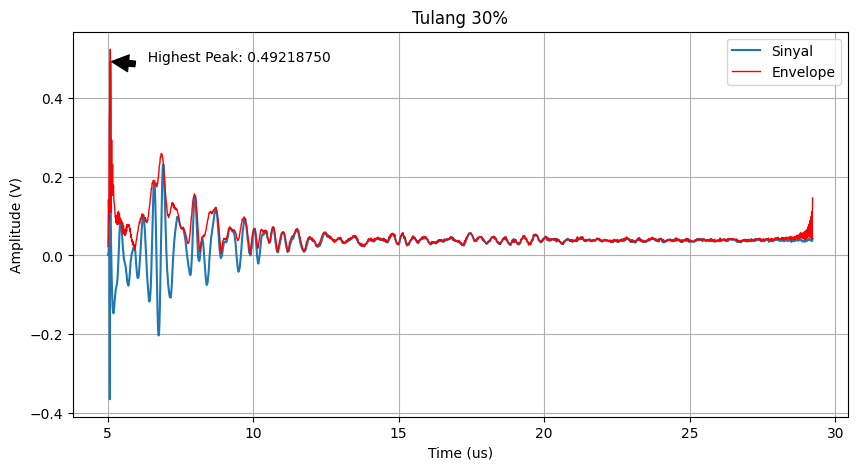

In [4]:
# 30% Raw
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y1[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y1)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x1, y1, label='Sinyal')
plt.plot(x1, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y1[highest_peak]:.8f}', 
             xy=(x1[highest_peak], 
                 y1[highest_peak]),
             xytext=(x1[highest_peak]+1, y1[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30%')
plt.legend()

highest_peak_value = y1[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.38359375'

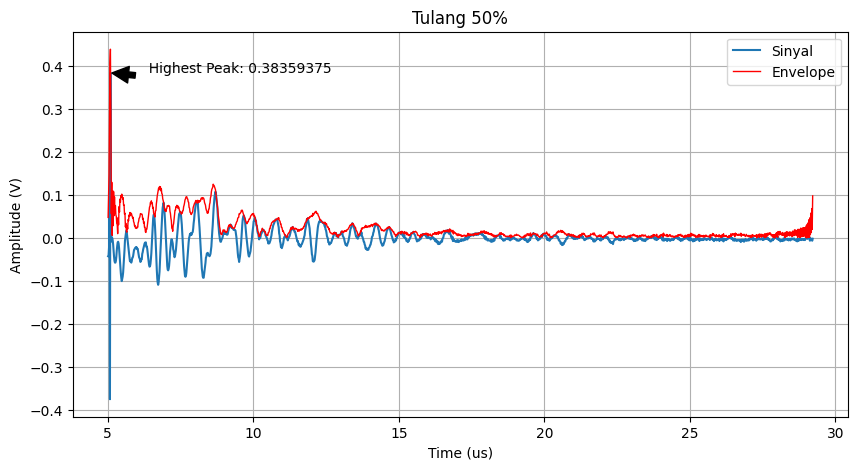

In [5]:
# 50% Raw
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y2[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y2)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x2, y2, label='Sinyal')
plt.plot(x2, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y2[highest_peak]:.8f}', 
             xy=(x2[highest_peak], 
                 y2[highest_peak]),
             xytext=(x2[highest_peak]+1, y2[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 50%')
plt.legend()

highest_peak_value = y2[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.27812500'

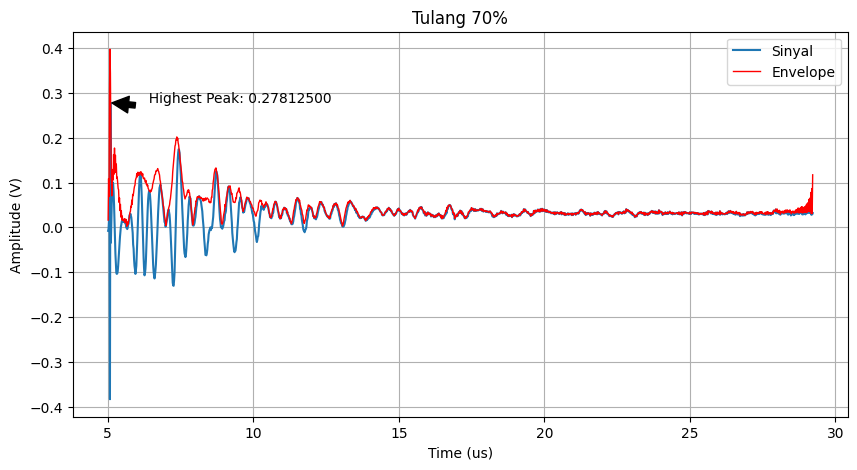

In [6]:
# 70% Raw
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y3[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y3)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x3, y3, label='Sinyal')
plt.plot(x3, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y3[highest_peak]:.8f}', 
             xy=(x3[highest_peak], 
                 y3[highest_peak]),
             xytext=(x3[highest_peak]+1, y3[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 70%')
plt.legend()

highest_peak_value = y3[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.31640625'

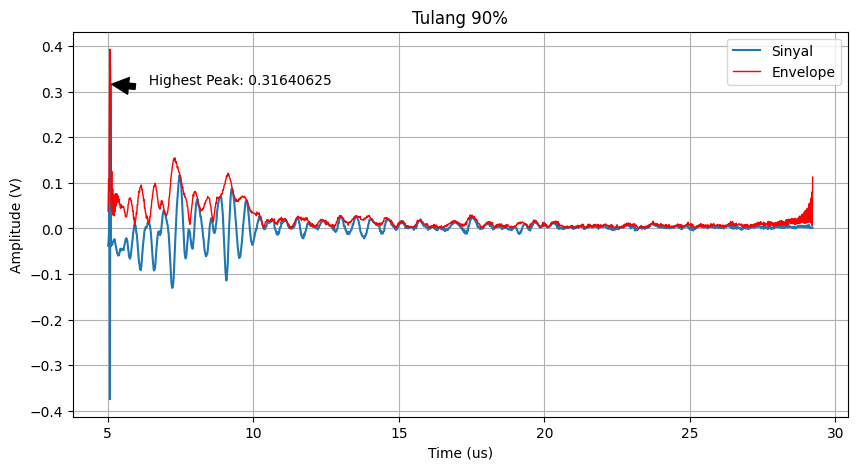

In [7]:
# 90% Raw
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y4[peaks].argmax()]  # mencari puncak tertinggi

# Menghitung envelope sinyal menggunakan transformasi Hilbert
analytic_signal = hilbert(y4)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(x4, y4, label='Sinyal')
plt.plot(x4, amplitude_envelope, 'r', linewidth=1, label='Envelope')
plt.annotate(f'  Highest Peak: {y4[highest_peak]:.8f}', 
             xy=(x4[highest_peak], 
                 y4[highest_peak]),
             xytext=(x4[highest_peak]+1, y4[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 90%')
plt.legend()

highest_peak_value = y4[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

In [8]:
# Define the filter parameters
lowcut = 2
highcut = 10
fs = 128.0
order = 7

In [9]:
# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')

# Filtered Variables
filtered_signal1 = signal.filtfilt(b, a, y1)
filtered_signal2 = signal.filtfilt(b, a, y2)
filtered_signal3 = signal.filtfilt(b, a, y3)
filtered_signal4 = signal.filtfilt(b, a, y4)

In [10]:
# Rectified Variables
rectified_signal1 = np.abs(filtered_signal1)
rectified_signal2 = np.abs(filtered_signal2)
rectified_signal3 = np.abs(filtered_signal3)
rectified_signal4 = np.abs(filtered_signal4)

In [11]:
# Perform Fourier transform
signal_fft1 = np.fft.fft(filtered_signal1)
signal_freq1 = np.fft.fftfreq(len(filtered_signal1), 1/fs)

signal_fft2 = np.fft.fft(filtered_signal2)
signal_freq2 = np.fft.fftfreq(len(filtered_signal2), 1/fs)

signal_fft3 = np.fft.fft(filtered_signal3)
signal_freq3 = np.fft.fftfreq(len(filtered_signal3), 1/fs)

signal_fft4 = np.fft.fft(filtered_signal4)
signal_freq4 = np.fft.fftfreq(len(filtered_signal4), 1/fs)

In [12]:
# Sisi
n = len(filtered_signal1)
freq1 = signal_freq1[0:int(n/2)]
fft_amp1 = np.abs(signal_fft1)[0:int(n/2)]/n*2

n = len(filtered_signal2)
freq2 = signal_freq2[0:int(n/2)]
fft_amp2 = np.abs(signal_fft2)[0:int(n/2)]/n*2

n = len(filtered_signal3)
freq3 = signal_freq3[0:int(n/2)]
fft_amp3 = np.abs(signal_fft3)[0:int(n/2)]/n*2

n = len(filtered_signal4)
freq4 = signal_freq4[0:int(n/2)]
fft_amp4 = np.abs(signal_fft4)[0:int(n/2)]/n*2

In [13]:
# Perform power spectral density (PSD) calculation
psd1 = (1/(fs*n)) * np.square(np.abs(signal_fft1[:n//2]))
psd2 = (1/(fs*n)) * np.square(np.abs(signal_fft2[:n//2]))
psd3 = (1/(fs*n)) * np.square(np.abs(signal_fft3[:n//2]))
psd4 = (1/(fs*n)) * np.square(np.abs(signal_fft4[:n//2]))

In [14]:
# Perform one-sided PSD (discard negative frequencies)
# Sisi Sisi
freq_psd1 = signal_freq1[0:int(n/2)]
psd_one_sided1 = psd1[0:int(n/2)]

freq_psd2 = signal_freq2[0:int(n/2)]
psd_one_sided2 = psd2[0:int(n/2)]

freq_psd3 = signal_freq3[0:int(n/2)]
psd_one_sided3 = psd3[0:int(n/2)]

freq_psd4 = signal_freq4[0:int(n/2)]
psd_one_sided4 = psd4[0:int(n/2)]

## Plot All

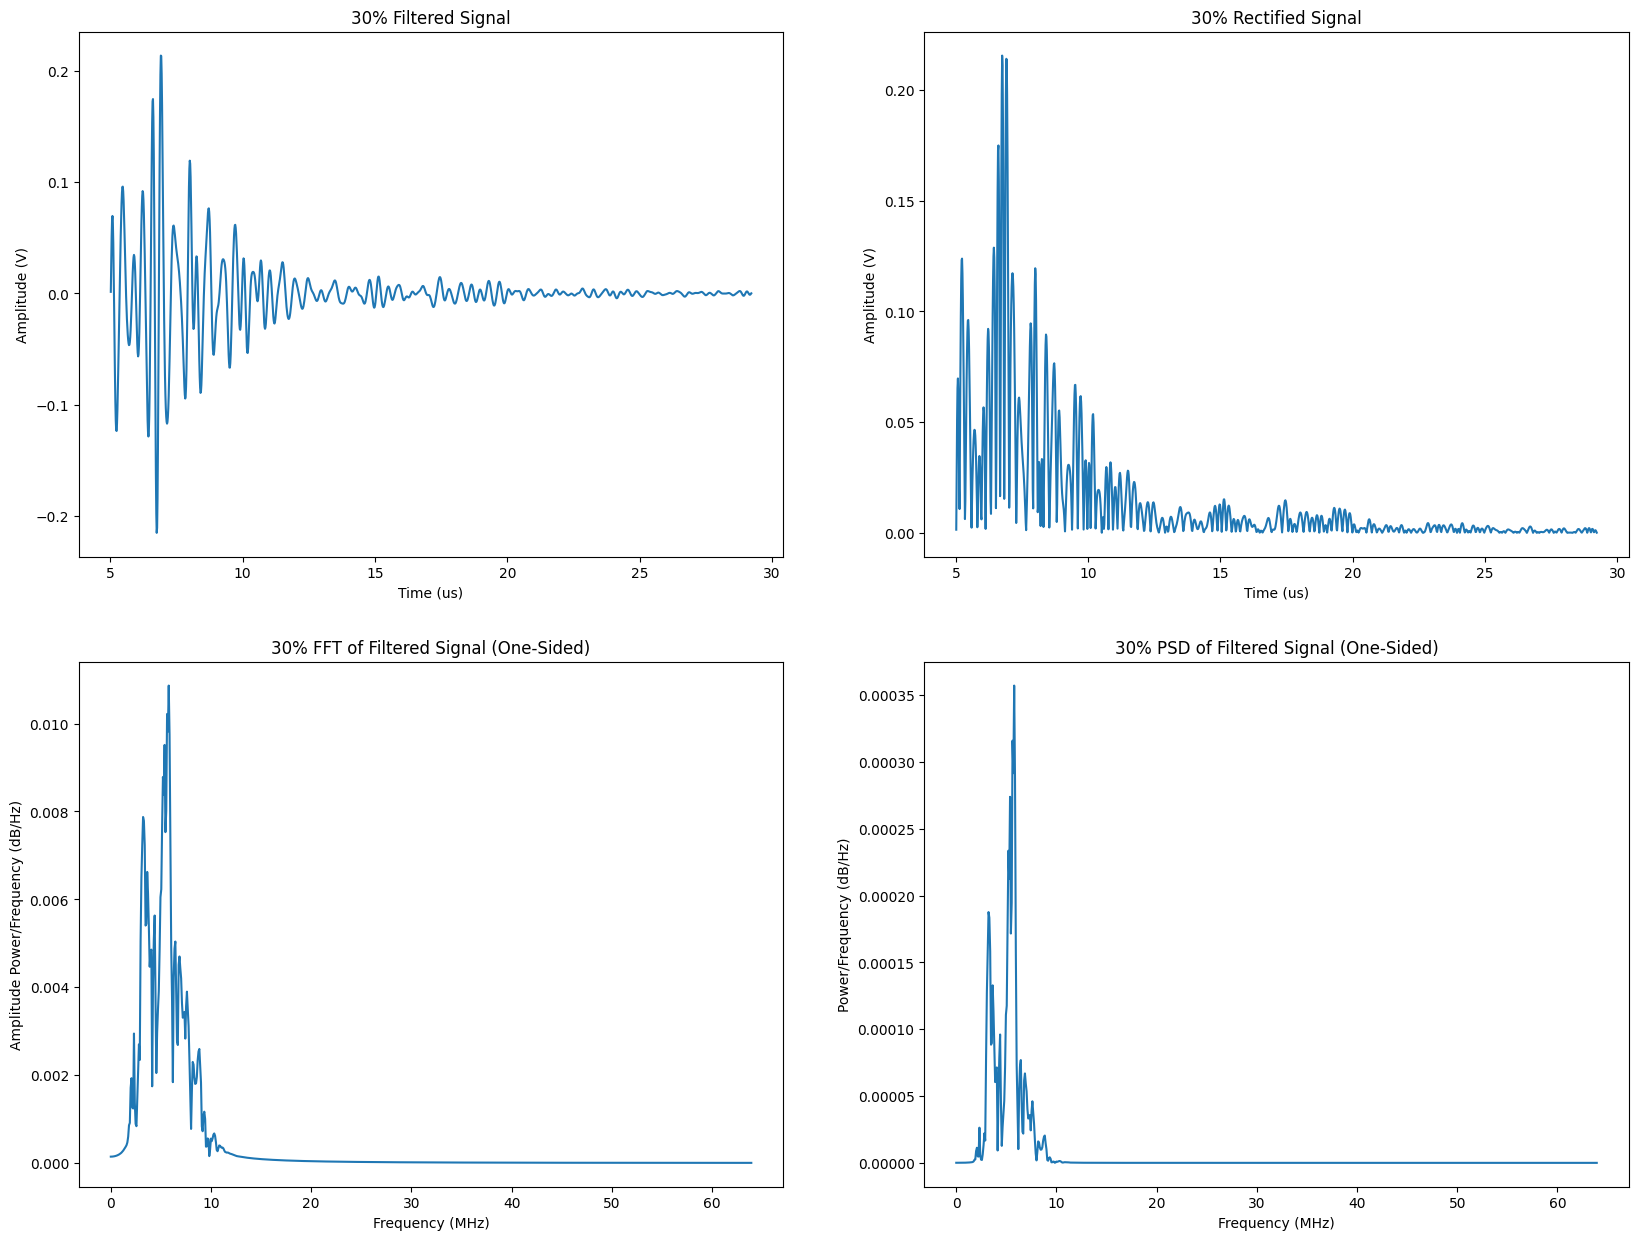

In [15]:
# 30%
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].plot(x1, filtered_signal1)
axs[0, 0].set_title('30% Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x1, rectified_signal1)
axs[0, 1].set_title('30% Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq1, fft_amp1)
axs[1, 0].set_title('30% FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd1, psd_one_sided1)
axs[1, 1].set_title('30% PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

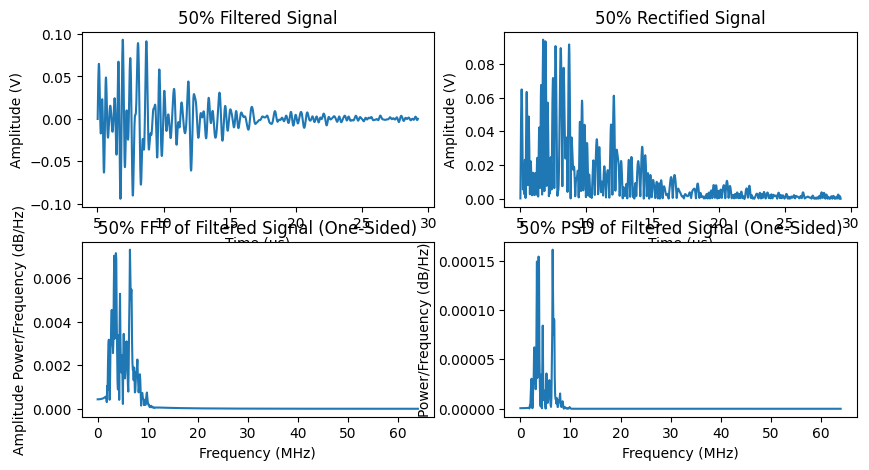

In [16]:
# 50%
fig, axs = plt.subplots(2, 2, figsize=(10,5))

axs[0, 0].plot(x2, filtered_signal2)
axs[0, 0].set_title('50% Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x2, rectified_signal2)
axs[0, 1].set_title('50% Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq2, fft_amp2)
axs[1, 0].set_title('50% FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd2, psd_one_sided2)
axs[1, 1].set_title('50% PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

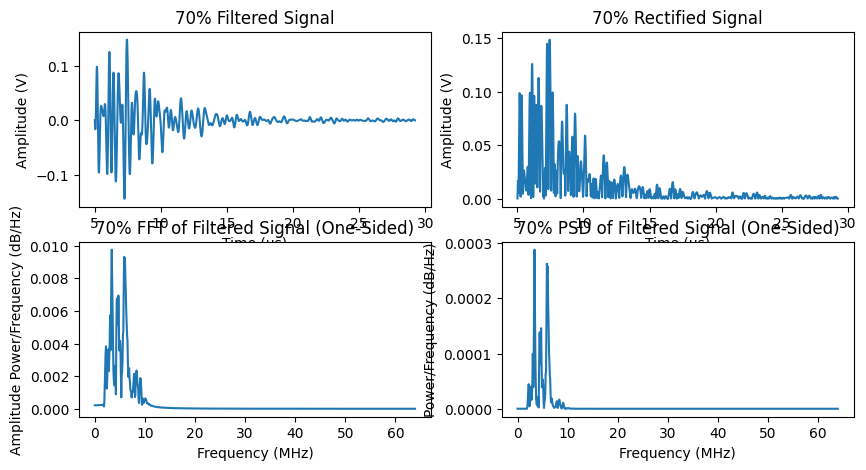

In [17]:
# 70%
fig, axs = plt.subplots(2, 2, figsize=(10,5))

axs[0, 0].plot(x3, filtered_signal3)
axs[0, 0].set_title('70% Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x3, rectified_signal3)
axs[0, 1].set_title('70% Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq3, fft_amp3)
axs[1, 0].set_title('70% FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd3, psd_one_sided3)
axs[1, 1].set_title('70% PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

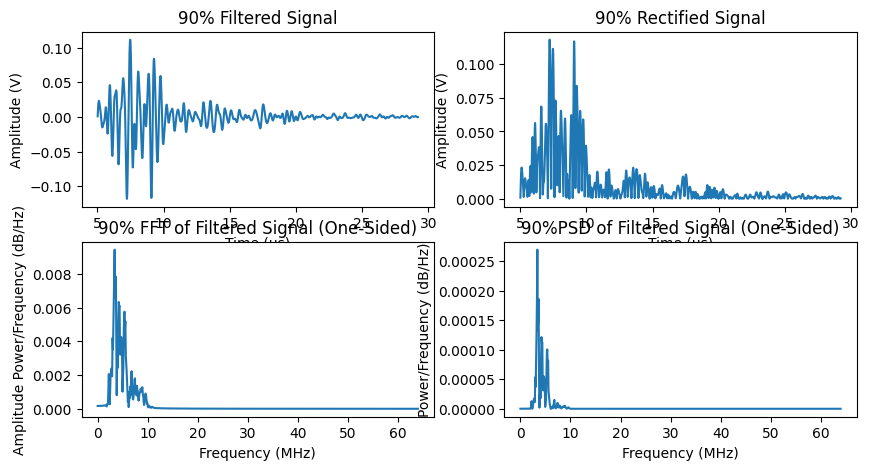

In [18]:
# 90%
fig, axs = plt.subplots(2, 2, figsize=(10,5))

axs[0, 0].plot(x4, filtered_signal4)
axs[0, 0].set_title('90% Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x4, rectified_signal4)
axs[0, 1].set_title('90% Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq4, fft_amp4)
axs[1, 0].set_title('90% FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd4, psd_one_sided4)
axs[1, 1].set_title('90%PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

## Filtered

'0.21405902'

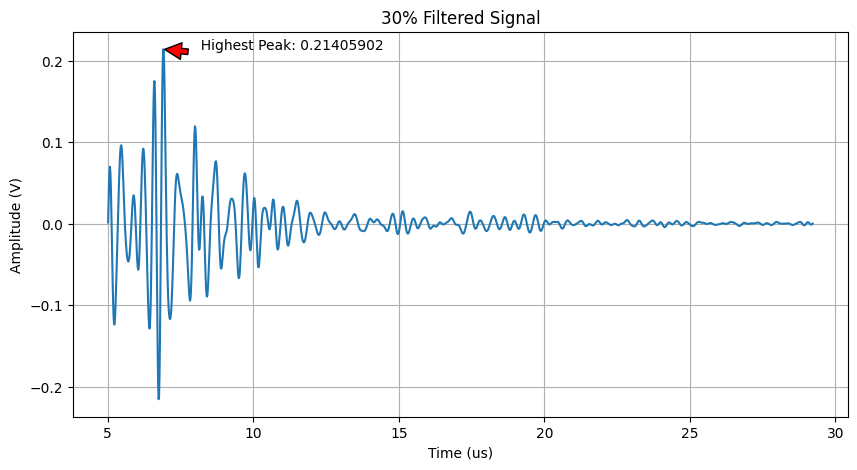

In [19]:
# 30%
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x1, filtered_signal1)
plt.annotate(f'  Highest Peak: {filtered_signal1[highest_peak]:.8f}', 
             xy=(x1[highest_peak], 
                 filtered_signal1[highest_peak]),
             xytext=(x1[highest_peak]+1, filtered_signal1[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('30% Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

highest_peak_value = filtered_signal1[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.09332003'

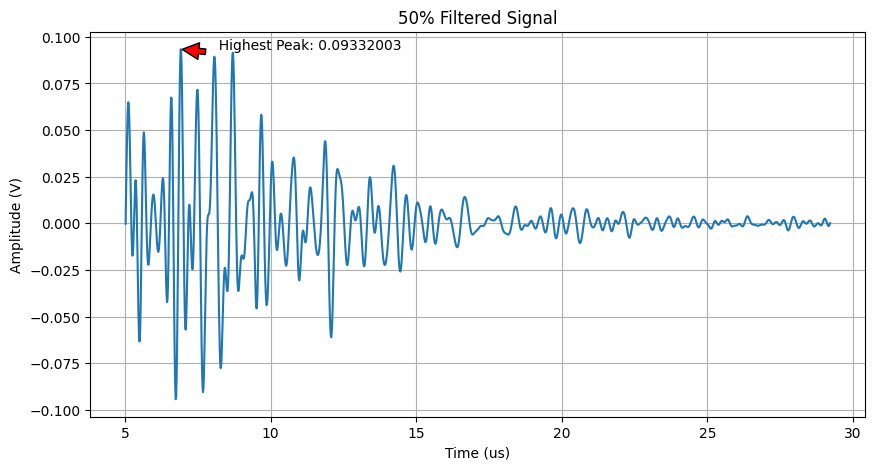

In [20]:
# 50%
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x2, filtered_signal2)
plt.annotate(f'  Highest Peak: {filtered_signal2[highest_peak]:.8f}', 
             xy=(x2[highest_peak], 
                 filtered_signal2[highest_peak]),
             xytext=(x2[highest_peak]+1, filtered_signal2[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('50% Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

highest_peak_value = filtered_signal2[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.14835437'

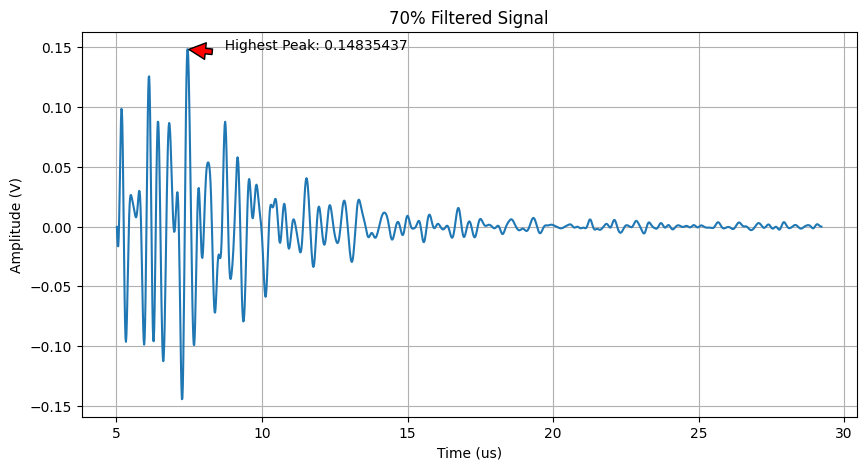

In [21]:
# 70%
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x3, filtered_signal3)
plt.annotate(f'  Highest Peak: {filtered_signal3[highest_peak]:.8f}', 
             xy=(x3[highest_peak], 
                 filtered_signal3[highest_peak]),
             xytext=(x3[highest_peak]+1, filtered_signal3[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('70% Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

highest_peak_value = filtered_signal3[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.11143865'

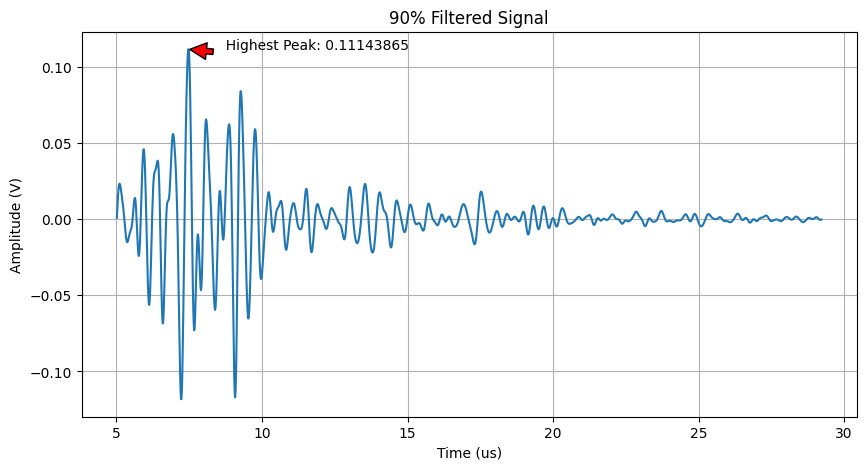

In [22]:
# 90%
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x4, filtered_signal4)
plt.annotate(f'  Highest Peak: {filtered_signal4[highest_peak]:.8f}', 
             xy=(x4[highest_peak], 
                 filtered_signal4[highest_peak]),
             xytext=(x4[highest_peak]+1, filtered_signal4[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('90% Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

highest_peak_value = filtered_signal4[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

## Rectified

'0.21550369'

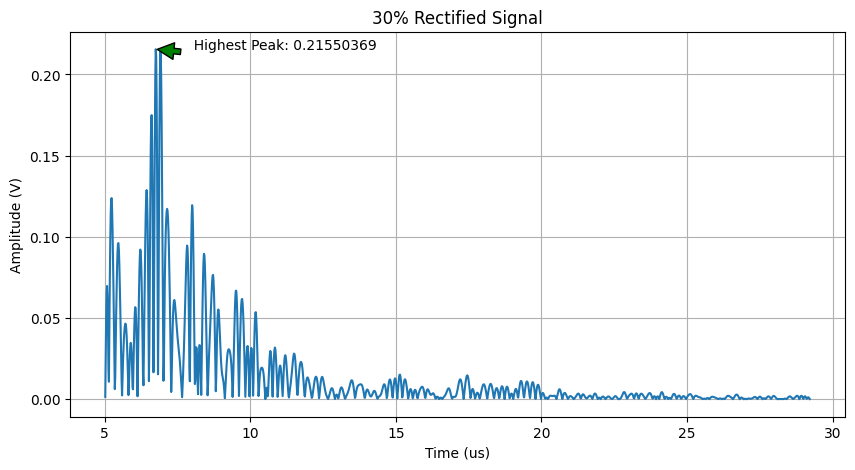

In [23]:
# 30% Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x1, rectified_signal1)
plt.annotate(f'  Highest Peak: {rectified_signal1[highest_peak]:.8f}', 
             xy=(x1[highest_peak], 
                 rectified_signal1[highest_peak]),
             xytext=(x1[highest_peak]+1, rectified_signal1[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('30% Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

highest_peak_value = rectified_signal1[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.09429959'

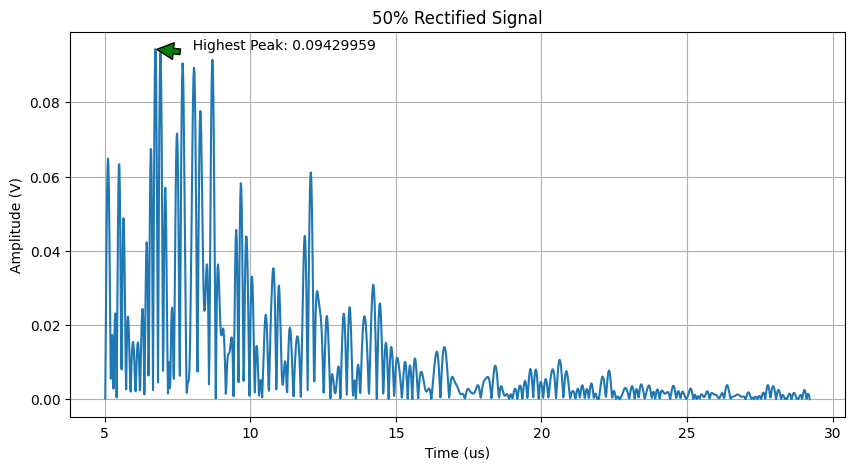

In [24]:
# 50% Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x2, rectified_signal2)
plt.annotate(f'  Highest Peak: {rectified_signal2[highest_peak]:.8f}', 
             xy=(x2[highest_peak], 
                 rectified_signal2[highest_peak]),
             xytext=(x2[highest_peak]+1, rectified_signal2[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('50% Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

highest_peak_value = rectified_signal2[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.14835437'

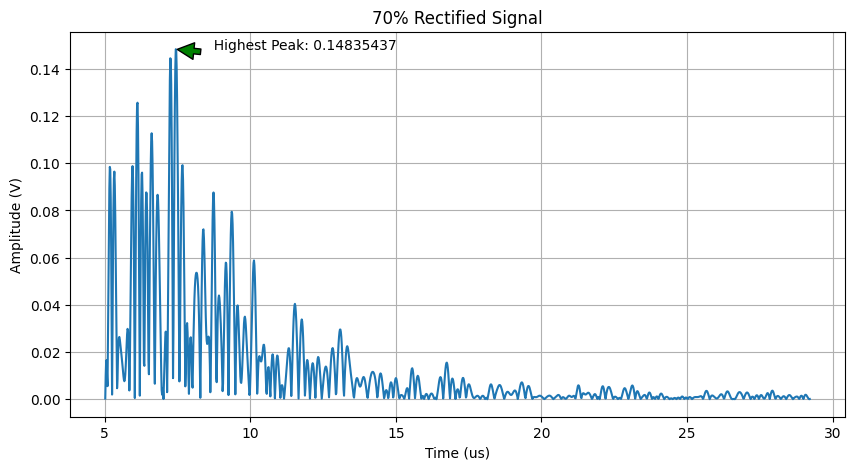

In [25]:
# 70% Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x3, rectified_signal3)
plt.annotate(f'  Highest Peak: {rectified_signal3[highest_peak]:.8f}', 
             xy=(x3[highest_peak], 
                 rectified_signal3[highest_peak]),
             xytext=(x3[highest_peak]+1, rectified_signal3[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('70% Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

highest_peak_value = rectified_signal3[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.11821810'

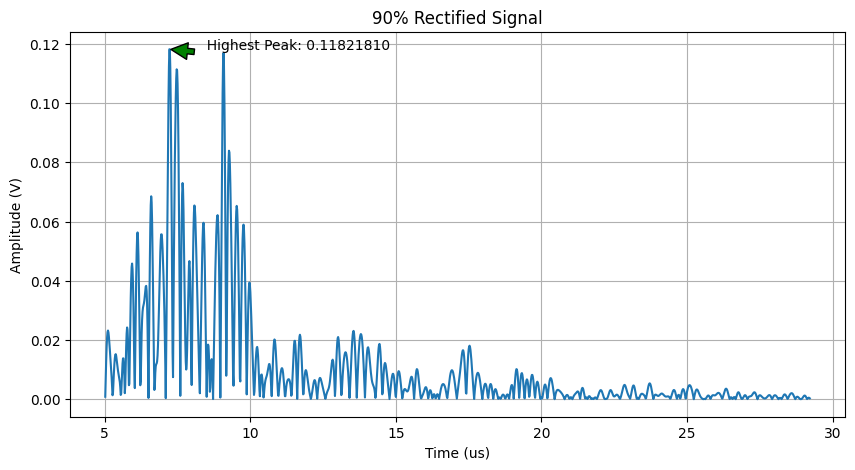

In [26]:
# 90% Rectified Signal
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x4, rectified_signal4)
plt.annotate(f'  Highest Peak: {rectified_signal4[highest_peak]:.8f}', 
             xy=(x4[highest_peak], 
                 rectified_signal4[highest_peak]),
             xytext=(x4[highest_peak]+1, rectified_signal4[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('90% Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

highest_peak_value = rectified_signal4[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

## FFT

'0.01086392'

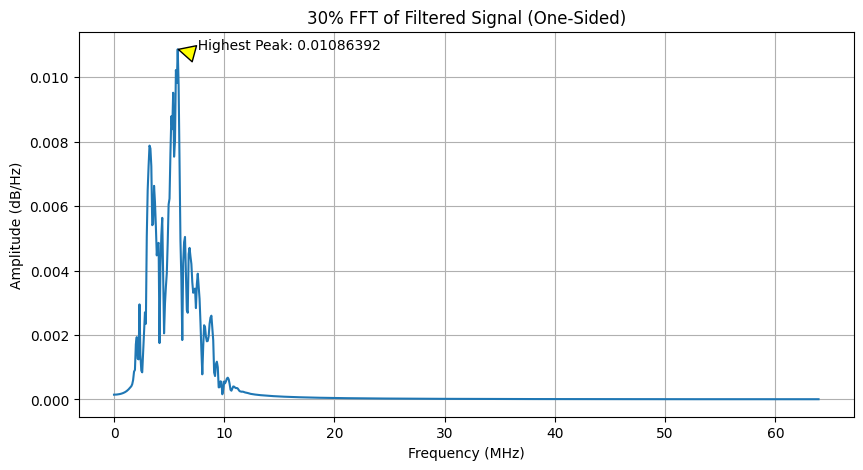

In [27]:
# 30% FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq1, fft_amp1)
plt.annotate(f'  Highest Peak: {fft_amp1[highest_peak]:.8f}', 
             xy=(freq1[highest_peak], 
                 fft_amp1[highest_peak]),
             xytext=(freq1[highest_peak]+1, fft_amp1[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('30% FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

highest_peak_value = fft_amp1[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.00729242'

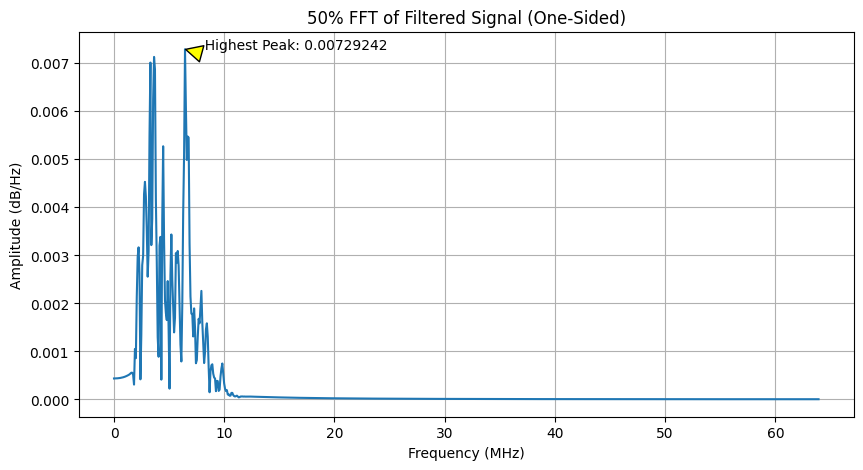

In [28]:
# 50% FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq2, fft_amp2)
plt.annotate(f'  Highest Peak: {fft_amp2[highest_peak]:.8f}', 
             xy=(freq2[highest_peak], 
                 fft_amp2[highest_peak]),
             xytext=(freq2[highest_peak]+1, fft_amp2[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('50% FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

highest_peak_value = fft_amp2[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.00975299'

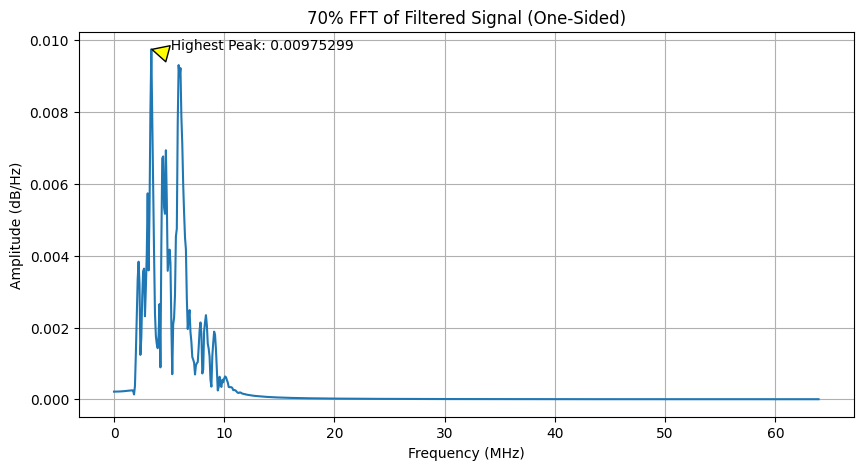

In [29]:
# 70% FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq3, fft_amp3)
plt.annotate(f'  Highest Peak: {fft_amp3[highest_peak]:.8f}', 
             xy=(freq3[highest_peak], 
                 fft_amp3[highest_peak]),
             xytext=(freq3[highest_peak]+1, fft_amp3[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('70% FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

highest_peak_value = fft_amp3[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.00943137'

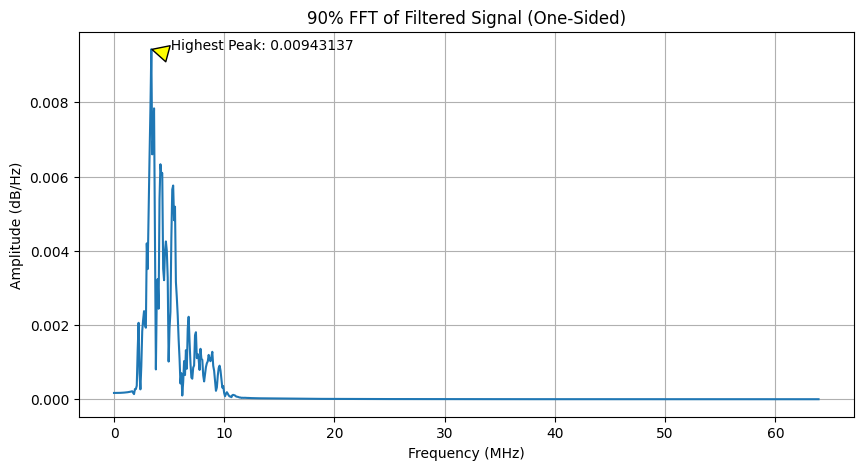

In [30]:
# 90% FFT of Filtered Signal (One-Sided)
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq4, fft_amp4)
plt.annotate(f'  Highest Peak: {fft_amp4[highest_peak]:.8f}', 
             xy=(freq4[highest_peak], 
                 fft_amp4[highest_peak]),
             xytext=(freq4[highest_peak]+1, fft_amp4[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('90% FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

highest_peak_value = fft_amp4[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

## PSD

'0.00035730'

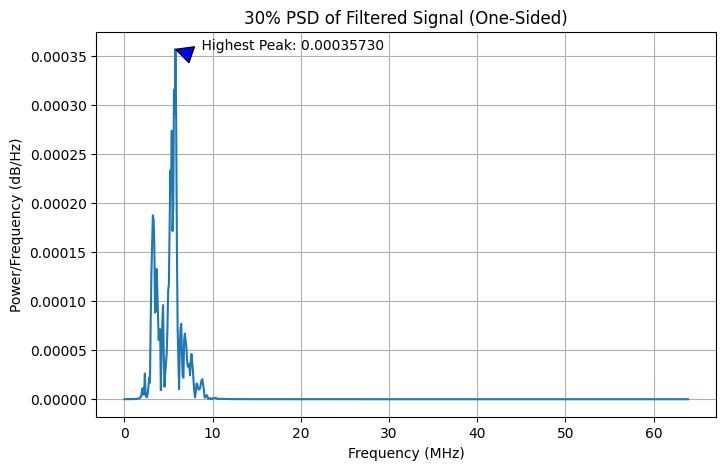

In [31]:
# 30% PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd1, psd_one_sided1)
plt.annotate(f'    Highest Peak: {psd_one_sided1[highest_peak]:.8f}', 
             xy=(freq_psd1[highest_peak], 
                 psd_one_sided1[highest_peak]),
             xytext=(freq_psd1[highest_peak]+1, psd_one_sided1[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('30% PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

highest_peak_value = psd_one_sided1[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.00016099'

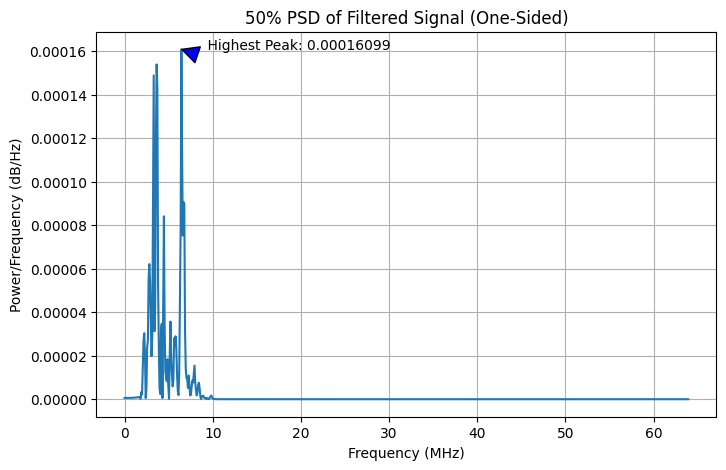

In [32]:
# 50% PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd2, psd_one_sided2)
plt.annotate(f'    Highest Peak: {psd_one_sided2[highest_peak]:.8f}', 
             xy=(freq_psd2[highest_peak], 
                 psd_one_sided2[highest_peak]),
             xytext=(freq_psd2[highest_peak]+1, psd_one_sided2[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('50% PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

highest_peak_value = psd_one_sided2[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.00028796'

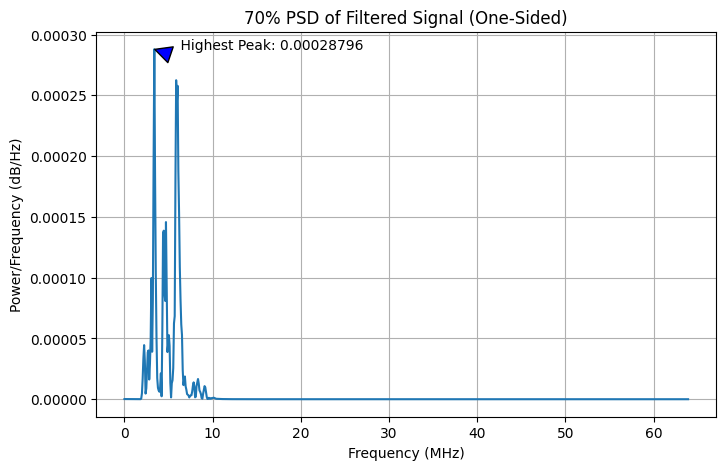

In [33]:
# 70% PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd3, psd_one_sided3)
plt.annotate(f'    Highest Peak: {psd_one_sided3[highest_peak]:.8f}', 
             xy=(freq_psd3[highest_peak], 
                 psd_one_sided3[highest_peak]),
             xytext=(freq_psd3[highest_peak]+1, psd_one_sided3[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('70% PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

highest_peak_value = psd_one_sided3[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

'0.00026928'

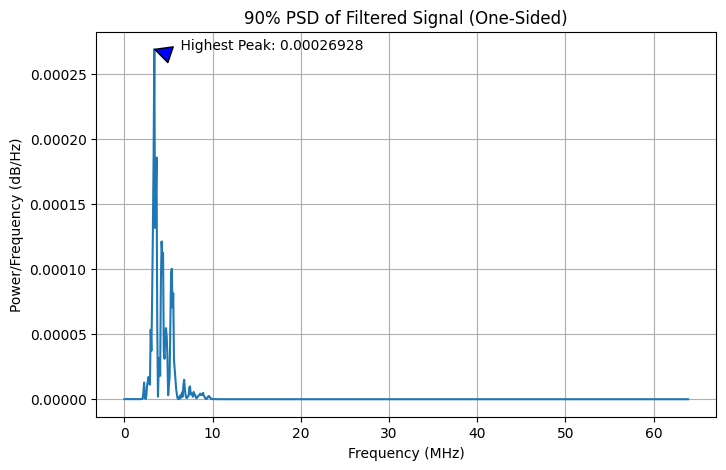

In [34]:
# 90% PSD of Filtered Signal (One-Sided)
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd4, psd_one_sided4)
plt.annotate(f'    Highest Peak: {psd_one_sided4[highest_peak]:.8f}', 
             xy=(freq_psd4[highest_peak], 
                 psd_one_sided4[highest_peak]),
             xytext=(freq_psd4[highest_peak]+1, psd_one_sided4[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('90% PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

highest_peak_value = psd_one_sided4[highest_peak]
formatted_value = f"{highest_peak_value:.8f}"
display(formatted_value)

## Regresi Polinomial

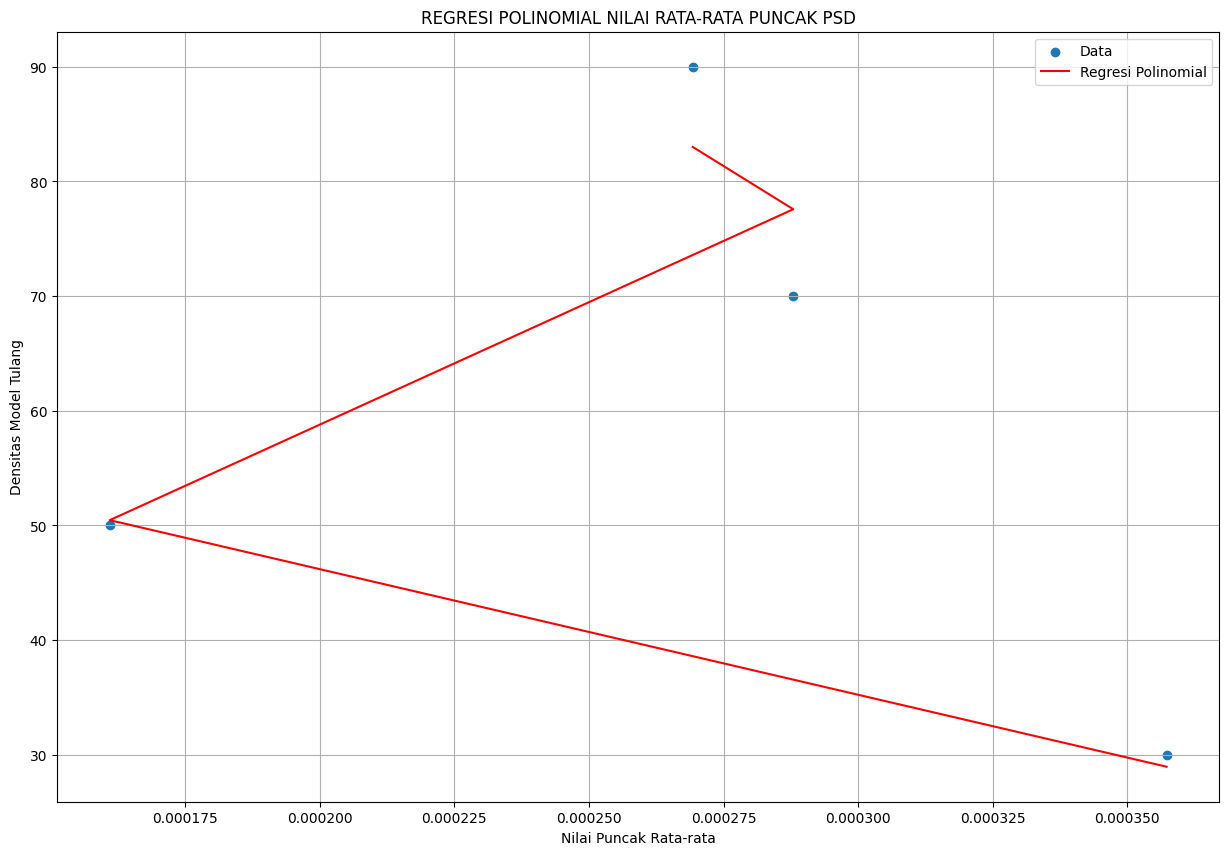

In [35]:
# PLOT NILAI PSD PUNCAK SISI ATAS
Y = np.array([30, 50, 70, 90])
X = np.array([0.00035730, 0.00016099, 0.00028796, 0.00026928])

# Membuat model regresi polinomial (contoh menggunakan polinomial derajat 2)
coefficients = np.polyfit(X, Y, 2)
a_2 = coefficients[0]
a_1 = coefficients[1]
a_0 = coefficients[2]

# Membuat persamaan regresi polinomial
regression_line = np.poly1d(coefficients)

# Plot data dan regresi polinomial
plt.figure(figsize=(15,10))
plt.scatter(X, Y, label='Data')
plt.plot(X, regression_line(X), color='red', label='Regresi Polinomial')
plt.xlabel('Nilai Puncak Rata-rata')
plt.ylabel('Densitas Model Tulang')
plt.title("REGRESI POLINOMIAL NILAI RATA-RATA PUNCAK PSD")
plt.legend()
plt.grid(True)
plt.show()